In [391]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

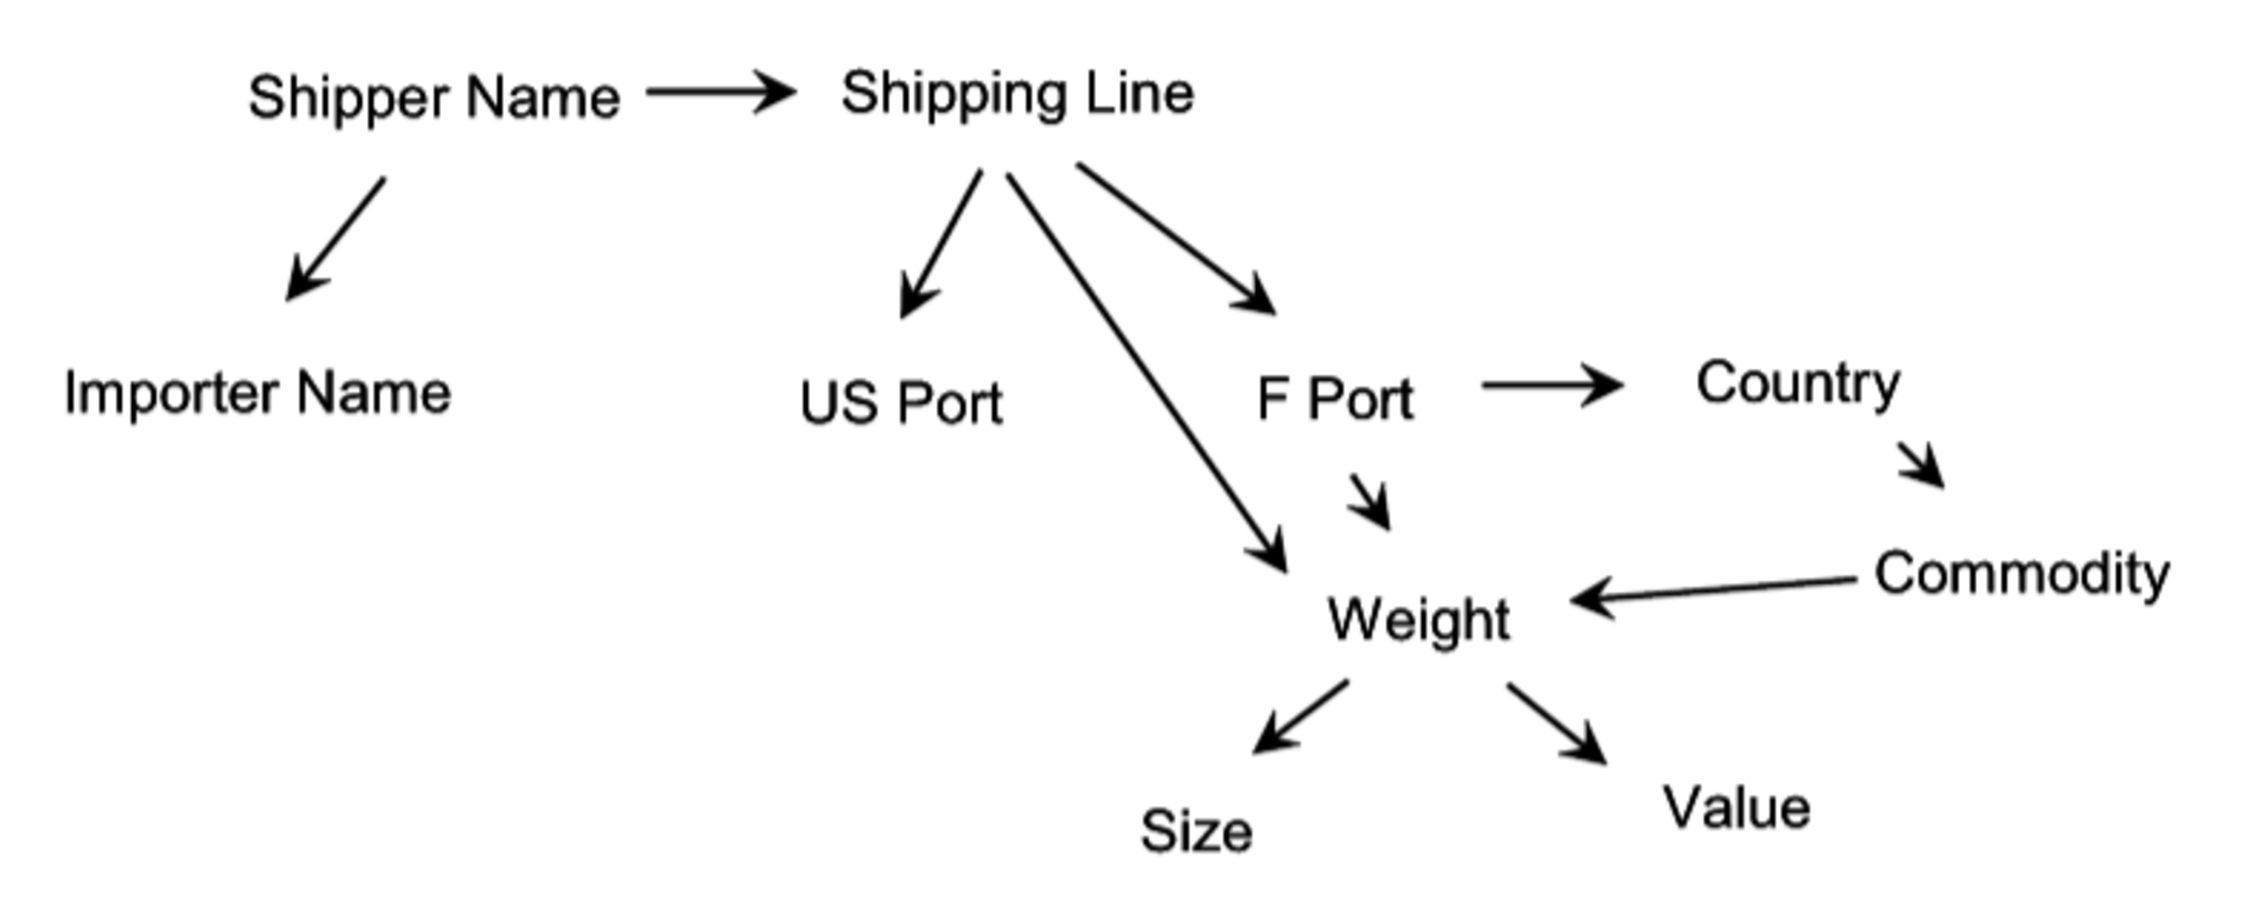

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color=blue>Dependent</font>

CI (Shipper Name, Value | Shipping Line)? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color=blue>Independent</font>

CI (Foreign Port, Commodity | Country)? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color=blue>Independent</font>

CI (Foreign Port, Commodity | County, Weight)? &nbsp;&nbsp;<font color=blue>Dependent</font>

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

<div style="text-align: left">
(a)
<br>
$P_r(Shipping\ line=ASCO,\ Weight=Heavy,\ Foreign\ Port=Vancouver,\ US\ Port=Seattle)$ 
<br>
$=P_r(Shipping\ line=ASCO)*P_r(Weight=Heavy\ |\ Shipping\ line=ASCO,\ F\ Port=Vancouver)*P_r(US\ Port=Seattle\ |\ Shipping\ line=ASCO)*P_r(F\ Port=Vancouver\ |\ Shipping\ line=ASCO)$
<br>
$=30\%*20\%*100\%*100\%$
<br>
$=6\%$
<br>
<br>
(b)
<br>
$P_r(Shipping\ line=CSCO,\ Weight=Heavy,\ Foreign\ Port=Vancouver,\ US\ Port=Seattle)$ 
<br>
$=P_r(Shipping\ line=CSCO)*P_r(Weight=Heavy\ |\ Shipping\ line=CSCO,\ F\ Port=Vancouver)*P_r(US\ Port=Seattle\ |\ Shipping\ line=CSCO)*P_r(F\ Port=Vancouver\ |\ Shipping\ line=CSCO)$
<br>
$=70\%*15\%*60\%*80\%$
<br>
$=5.04\%$
<br>
<br>
(c)
<br>
$P_r(Shipping\ line=CSCO,\ Weight=Heavy,\ Foreign\ Port=Yokohama,\ US\ Port=Los\  Angeles)$ 
<br>
$=P_r(Shipping\ line=CSCO)*P_r(Weight=Heavy\ |\ Shipping\ line=CSCO,\ F\ Port=Yokohama)*P_r(US\ Port=Los\ Angeles\ |\ Shipping\ line=CSCO)*P_r(F\ Port=Yokohama\ |\ Shipping\ line=CSCO)$
<br>
$=70\%*60\%*20\%*40\%$
<br>
$=3.36\%$
<br>
<br>
So (c) is the most anomalous.
</div>

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,2,0,0,1,0,1
2,3,1,0,1,1,1
3,2,0,0,1,1,1
4,1,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [27]:
#(a)
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore

hc = HillClimbSearch(train, scoring_method=BicScore(data2))
best_model = hc.estimate()
print((best_model.edges()))

[('B', 'A'), ('D', 'A'), ('F', 'A')]


In [28]:
#(b)
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in model.get_cpds():
    print(("CPD of {variable}:".format(variable=cpd.variable)))
    print(cpd)

CPD of A:
+------+-----------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| B    | B(0)            | B(0)              | B(0)             | B(0)              | B(1)              | B(1)              | B(1)              | B(1)              |
+------+-----------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| D    | D(0)            | D(0)              | D(1)             | D(1)              | D(0)              | D(0)              | D(1)              | D(1)              |
+------+-----------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| F    | F(0)            | F(1)              | F(0)             | F(1)              | F(0)              | F(1)              | F(0)              | F(1)          

In [30]:
#(c)
test['A'].head()

3644    2
9184    3
520     2
5685    2
2401    1
Name: A, dtype: int64

In [31]:
predict = model.predict(test[['B','D','F']])

In [32]:
predict.head()

,A
3644,2
9184,3
520,2
5685,2
2401,0


In [43]:
print('The out-of-sample accuracy is {}%'.format(float(sum(predict['A']==test['A']))/len(test)*100))

The out-of-sample accuracy is 51.425%


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [262]:
pd.DataFrame({'community1':[0.7,0.3],'community2':[0.3,0.7],'tot_number':['X','Y']},index=['crime1','crime2'])

,community1,community2,tot_number
crime1,0.7,0.3,X
crime2,0.3,0.7,Y


In [263]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head(1)

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.13881,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.01983,0.016997,0.01983,0.022663,0.005666,0.0,0.002833,0.005666,0.0,0.002833


In [264]:
# Use k-means package from sklearn
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=3)
res=km.fit(data3[[x for x in data3.columns if 'hour' in x]])

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 2 1 1 1 1 1 1 0 0 2 0 2 0 0 0 0 0 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 0 0
 1 1 0 2 2 1 1 2 1 1 0 0 2 1 2 1 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 0]

Cluster centers:
[[ 0.05360147  0.04166239  0.03662852  0.03085427  0.02484587  0.01871073
   0.01927123  0.02410426  0.02748808  0.03326486  0.03672126  0.03726032
   0.04254884  0.04006501  0.0422845   0.04746795  0.05156698  0.05400084
   0.05758133  0.05642852  0.05787719  0.05456468  0.05882918  0.05237173]
 [ 0.0424857   0.0124839   0.01063242  0.00917263  0.00935287  0.00782255
   0.01345328  0.02374573  0.05099082  0.09235549  0.07911561  0.06020408
   0.08877015  0.06328364  0.06309555  0.06824587  0.06216217  0.05215833
   0.04915732  0.04164785  0.03414496  0.02476704  0.02192139  0.01883064]
 [ 0.02465088  0.01421785  0.01097487  0.00556891  0.00258076  0.0010512
   0.00384291  0.00864166  0.01199454  0.02444421  

In [265]:
#(a)
crime = data3[[x for x in data3.columns if 'hour' in x]].copy()
crime['labels'] = res.labels_

In [266]:
hr_mean = pd.DataFrame({'hour_{}'.format(x):0 for x in range(0,24)},index=[0,1,2])
hr_mean.columns = sorted(hr_mean.columns,key=lambda x: int(x[5:]))

In [267]:
for i in range(0,3):
    hr_mean.iloc[i] = crime[crime['labels']==i].mean(0)

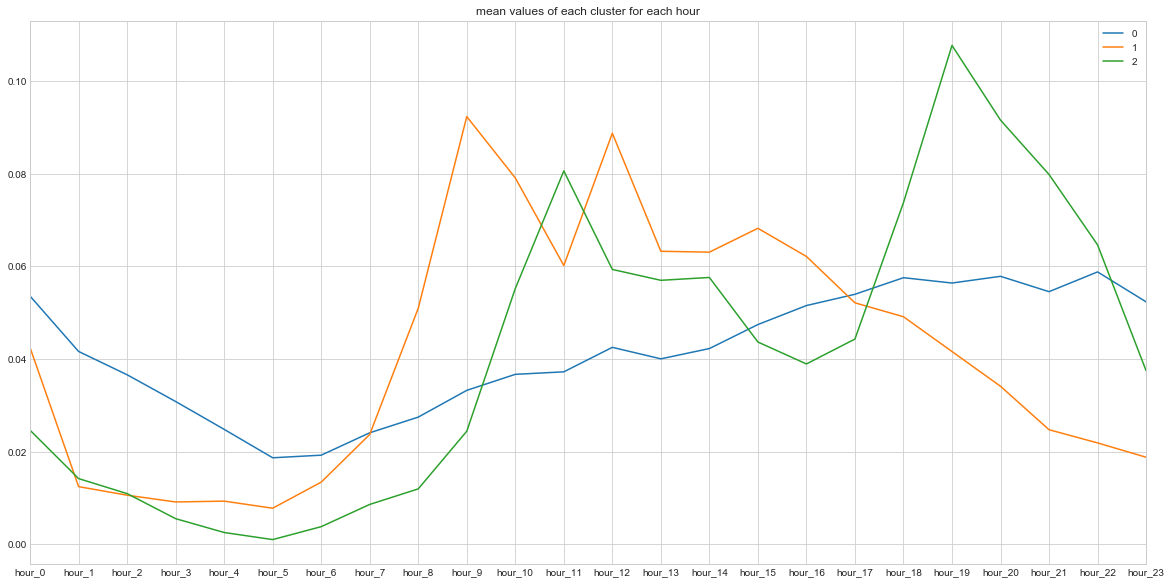

In [268]:
hr_mean.T.plot(figsize=[20,10],xticks=range(24),title='mean values of each cluster for each hour')

#### Fig1. mean values of each cluster for each hour

(b)
For the first cluster, we can see that the proportion of these crime types are not changing heavily except that there is a decline at midnight
For the second cluster, we can see that the proportion of these crime types is peaking at morning and then decline slowly at afternoon
For the third cluster, we can see that the proportion of these crime types is also peaking at morning and then decline at noon but it starts to peak higher at night and then decline at midnight



In [269]:
#(c)
data3['labels'] = res.labels_

In [270]:
data3.columns[[0,-1]]

Index([u'crime_type', u'labels'], dtype='object')

In [509]:
type = data3[data3.columns[[0,-1]]]

In [512]:
type.insert(1,'TYPE',list(type['crime_type'].str.split(':').str[0]))

In [517]:
type.groupby(['labels','TYPE']).count()

crime_type
labels TYPE                                        
0      ARSON                                      1
       ASSAULT                                    6
       BATTERY                                   12
       BURGLARY                                   3
       CRIM SEXUAL ASSAULT                        2
       CRIMINAL DAMAGE                            5
       CRIMINAL TRESPASS                          4
       DECEPTIVE PRACTICE                         2
       HOMICIDE                                   1
       INTERFERENCE WITH PUBLIC OFFICER           1
       LIQUOR LAW VIOLATION                       1
       MOTOR VEHICLE THEFT                        3
       NARCOTICS                                  2
       OFFENSE INVOLVING CHILDREN                 2
       OTHER OFFENSE                              5
       ROBBERY                                    9
       SEX OFFENSE                                2
       STALKING                                   1
       THEFT                                      4
       WEAPONS VIOLATION                          4
1      ASSAULT                                    1
       BATTERY                                    1
       BURGLARY                                   1
       DECEPTIVE PRACTICE                         9
       NARCOTICS                                  1
       OFFENSE INVOLVING CHILDREN                 2
       OTHER OFFENSE                              7
       PUBLIC PEACE VIOLATION                     1
       SEX OFFENSE                                1
       THEFT                                      3
2      DECEPTIVE PRACTICE                         1
       GAMBLING                                   1
       INTERFERENCE WITH PUBLIC OFFICER           1
       NARCOTICS                                 12
       OTHER OFFENSE                              5
       PROSTITUTION                               1
       PUBLIC PEACE VIOLATION                     1

#### We can see that in cluster1 assault and battery are more likely to happen, in cluster2 deceptive practice and robbery are more likely to happen and in cluster3 narcotics are more likely to happen.

In [272]:
#(d)
crime_day = data3[[x for x in data3.columns if 'day' in x]+['labels']].copy()

In [273]:
day_mean = pd.DataFrame({x:0 for x in crime_day.columns[:-1]},index=[0,1,2])
day_mean.columns = crime_day.columns[:-1]

In [274]:
for i in range(0,3):
    day_mean.iloc[i] = crime_day[crime_day['labels']==i].iloc[:,:-1].mean(0)

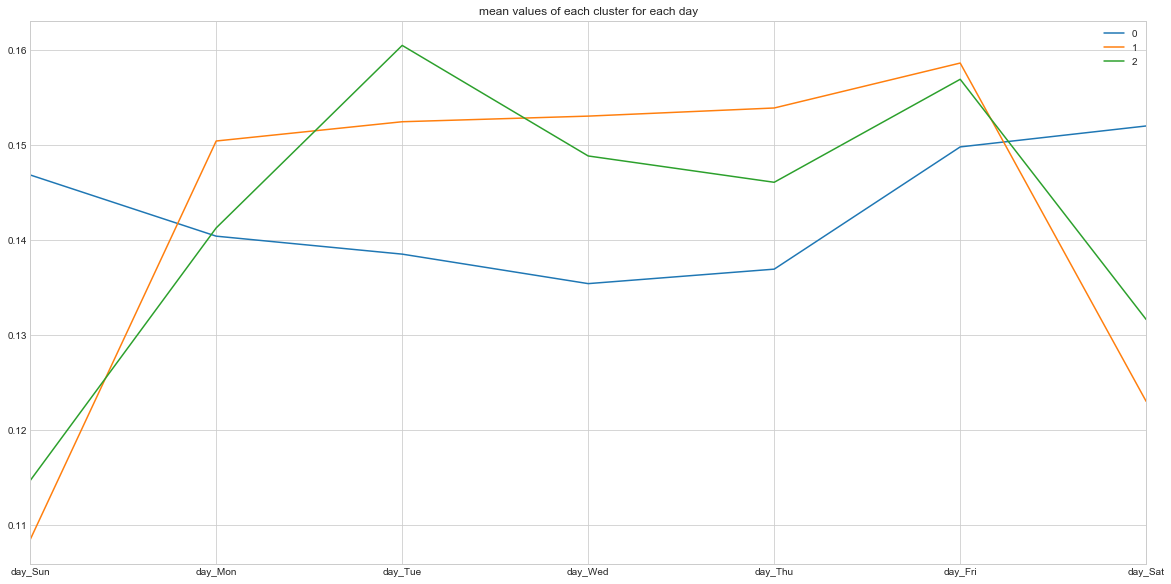

In [275]:
day_mean.T.plot(figsize=[20,10],xticks=range(7),title='mean values of each cluster for each day')

#### Fig2. mean values of each of the clusters for each day

From cluster 1, we can see that the crimes in this cluster are not changing heavily and are steady
From cluster 2&3, we can see that the crimes in this cluster are more likely to happen in weekday

In [276]:
#(e)

In [277]:
prop_cluster = pd.DataFrame({'cluster1':0,'cluster2':0,'cluster3':0},index = range(len([x for x in data3.columns if 'community' in x])))

In [278]:
prop_cluster.iloc[0]

cluster1    0
cluster2    0
cluster3    0
Name: 0, dtype: int64

In [279]:
community = data3[[x for x in data3.columns if 'community' in x]]

In [284]:
for i in range(77):
    prop_cluster.iloc[i] = [community.iloc[:,i][data3['labels']==0].mean(),community.iloc[:,i][data3['labels']==1].mean(),community.iloc[:,i][data3['labels']==2].mean()]

In [285]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head(3)

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330


In [304]:
prop_cluster.join(data4).iloc[:,:3].T

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
cluster1,0.014063,0.012539,0.013563,0.007220,0.004095,0.020895,0.010175,0.027591,0.000680,0.003464,...,0.026472,0.028997,0.009295,0.029066,0.002842,0.011455,0.001561,0.007094,0.010014,0.007291
cluster2,0.014446,0.014380,0.016437,0.010941,0.007502,0.024766,0.018054,0.053912,0.002169,0.007858,...,0.017873,0.020703,0.010150,0.023909,0.005234,0.011028,0.004348,0.009446,0.009696,0.012677
cluster3,0.007933,0.005855,0.007573,0.002209,0.001145,0.006267,0.001626,0.014067,0.000393,0.001321,...,0.037812,0.027129,0.002288,0.032473,0.000902,0.009801,0.000580,0.007220,0.000915,0.001499


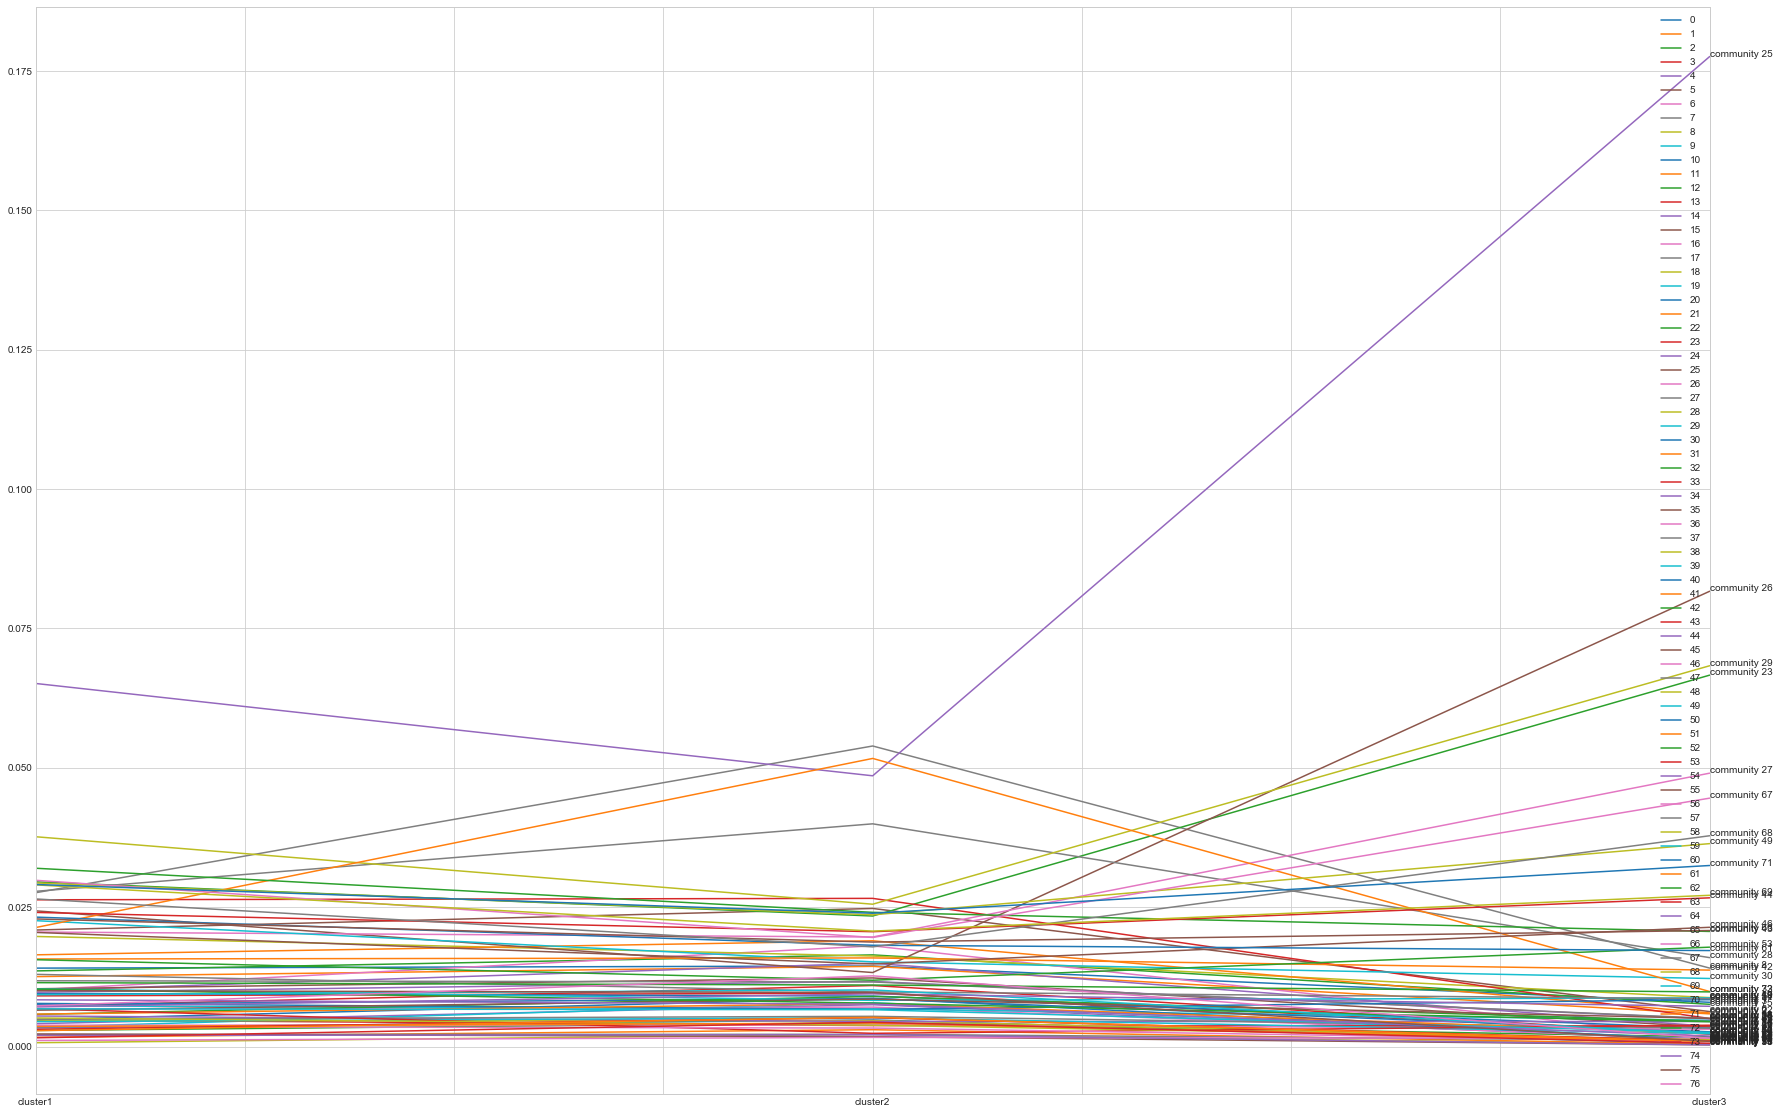

In [314]:
ax = prop_cluster.join(data4).iloc[:,:3].T.plot(figsize=[30,20])
for i in range(1,78):
    ax.text(2,prop_cluster.join(data4).iloc[:,:3].T.iloc[2,i-1],'community {}'.format(i))

In [421]:
c1 = prop_cluster.join(data4).iloc[:,:3].T.iloc[[0]].T
c1.insert(0,'community',range(77))

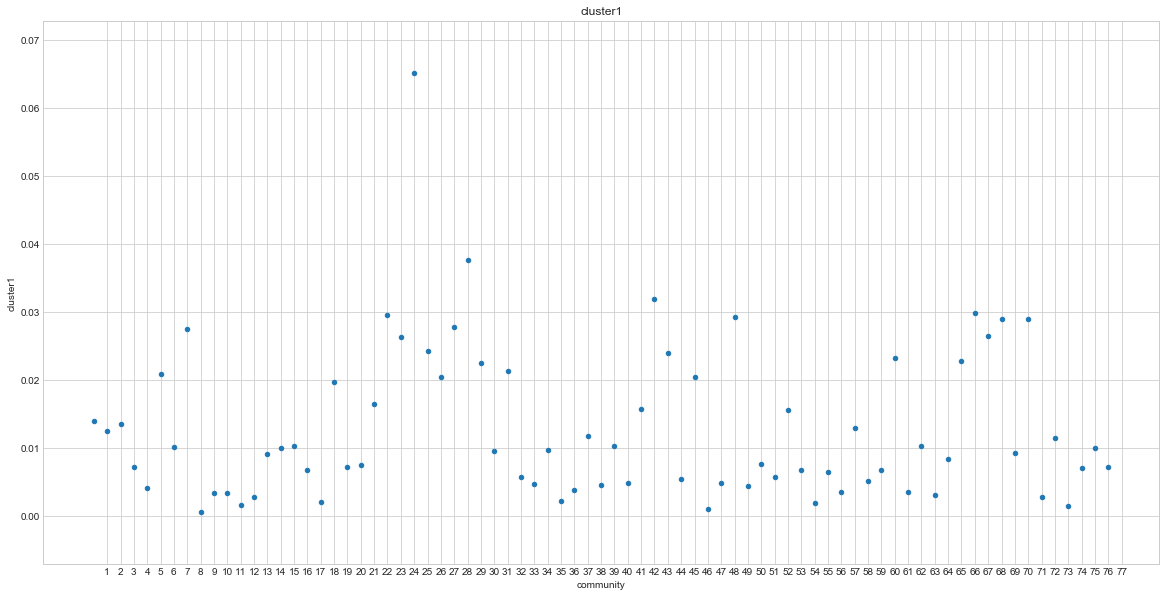

In [429]:
c1.plot(kind='scatter',x='community',y='cluster1',figsize=[20,10],xticks=range(1,78),title='cluster1')

#### We can see that for cluster1, community 24 tends to be high but from data4, I cannot see anything special of it

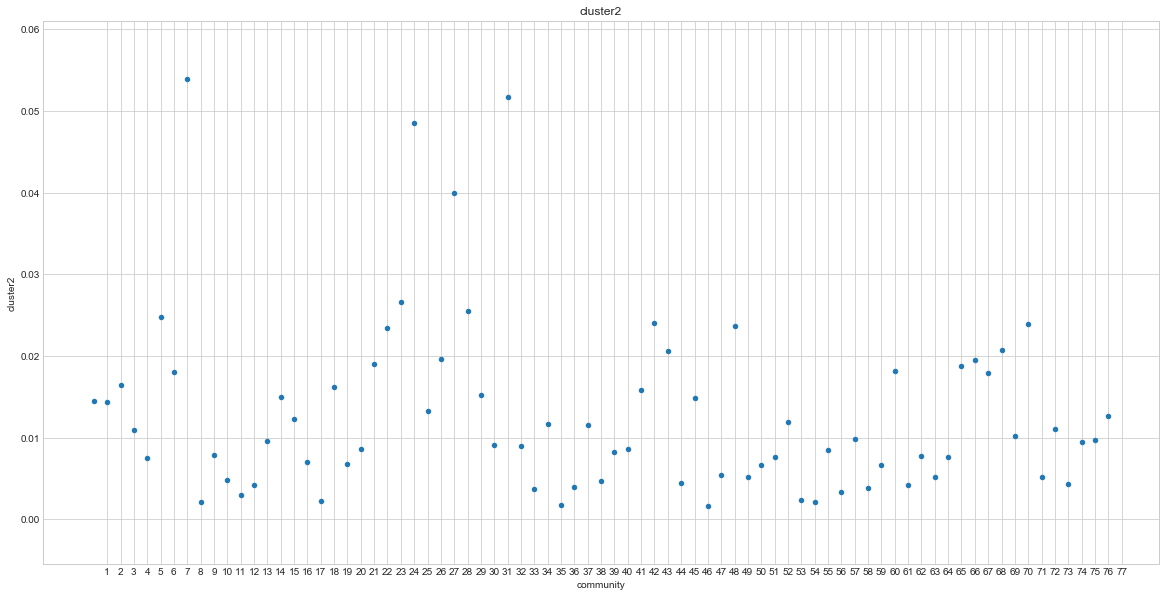

In [432]:
c2 = prop_cluster.join(data4).iloc[:,:3].T.iloc[[1]].T
c2.insert(0,'community',range(77))
c2.plot(kind='scatter',x='community',y='cluster2',figsize=[20,10],xticks=range(1,78),title='cluster2')

#### We can see that for cluster2, community 7,24,27,31 tend to be high but from data4, I cannot see anything special of them

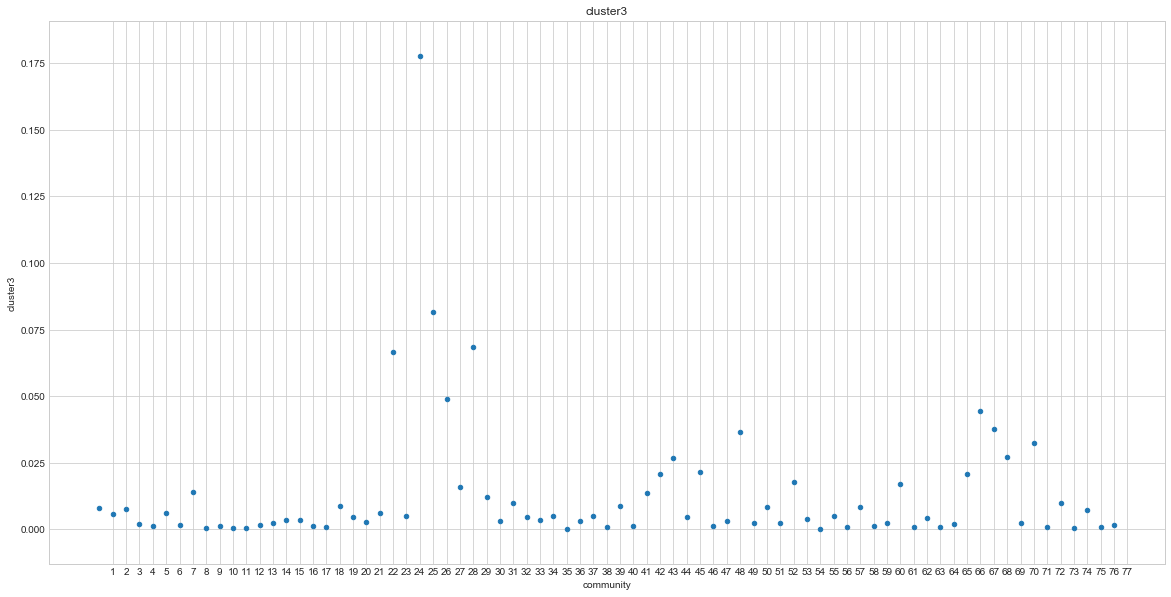

In [433]:
c3 = prop_cluster.join(data4).iloc[:,:3].T.iloc[[2]].T
c3.insert(0,'community',range(77))
c3.plot(kind='scatter',x='community',y='cluster3',figsize=[20,10],xticks=range(1,78),title='cluster3')

#### We can see that for cluster3, community 24 tends to be high but from data4, I cannot see anything special of them

In [446]:
import urllib
import zipfile
import geopandas as gpd
import os

In [435]:
urllib.urlretrieve('https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile','chicago.zip')

('chicago.zip', <httplib.HTTPMessage instance at 0x0000000016CE9F08>)

In [439]:
shp = zipfile.ZipFile('chicago.zip')

In [440]:
shp.extractall('./chicago/')

In [450]:
chicago = gpd.GeoDataFrame.from_file('./chicago/'+[file for file in os.listdir('./chicago/') if 'shp' in file][0])

In [460]:
community_crime = prop_cluster.join(data4).iloc[:,:3]
community_crime.insert(0,'area_num_1',range(1,78))

In [467]:
chicago['area_num_1'] = chicago['area_num_1'].astype('int')

In [471]:
shp = chicago.merge(community_crime,on='area_num_1')

In [472]:
shp.head()

,perimeter,community,shape_len,shape_area,area,comarea,area_numbe,area_num_1,comarea_id,geometry,cluster1,cluster2,cluster3
0,0.0,DOUGLAS,31027.054510,4.600462e+07,0.0,0.0,35,35,0.0,POLYGON ((-87.60914087617894 41.84469250265398...,0.009740,0.011673,0.004963
1,0.0,OAKLAND,19565.506153,1.691396e+07,0.0,0.0,36,36,0.0,POLYGON ((-87.59215283879394 41.81692934626684...,0.002244,0.001771,0.000293
2,0.0,FULLER PARK,25339.089750,1.991670e+07,0.0,0.0,37,37,0.0,POLYGON ((-87.62879823733725 41.80189303368919...,0.003807,0.003917,0.003105
3,0.0,GRAND BOULEVARD,28196.837157,4.849250e+07,0.0,0.0,38,38,0.0,"POLYGON ((-87.6067081256125 41.81681377057218,...",0.011797,0.011583,0.005045
4,0.0,KENWOOD,23325.167906,2.907174e+07,0.0,0.0,39,39,0.0,POLYGON ((-87.59215283879394 41.81692934626684...,0.004644,0.004641,0.001060


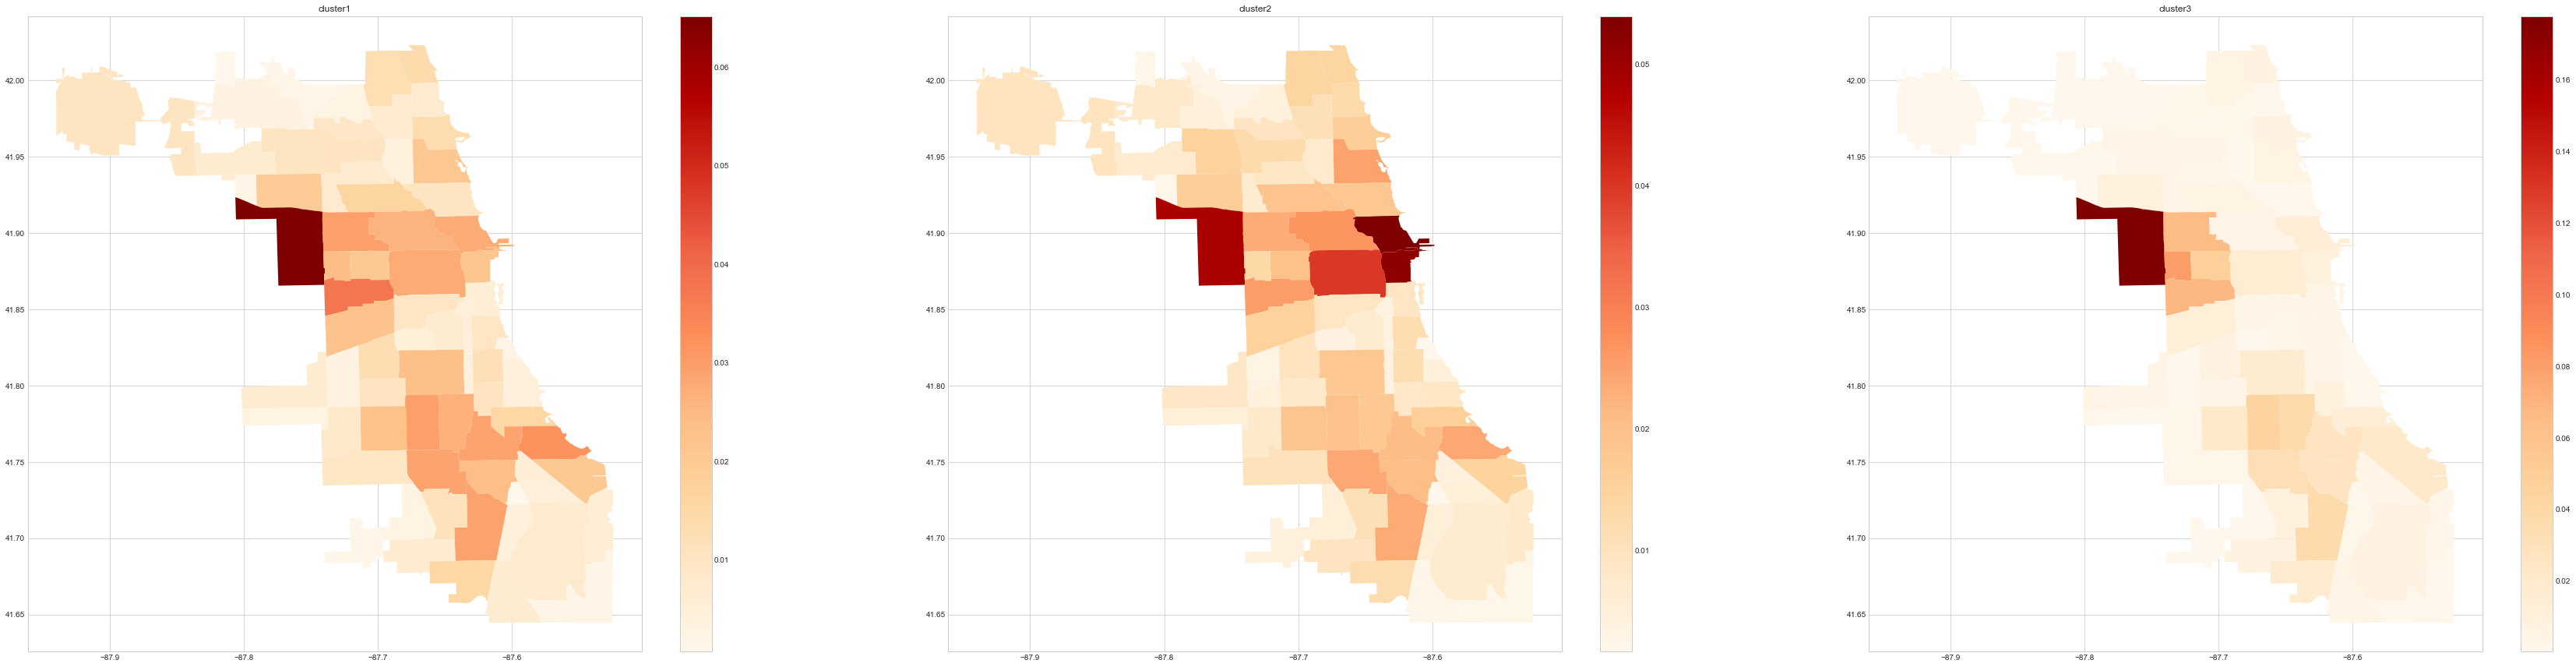

In [489]:
fig = plt.figure(figsize=[60,15])
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    shp.plot(column='cluster{}'.format(i+1),figsize=[10,10],colormap='OrRd',legend=True,ax=ax)
    ax.set_title('cluster{}'.format(i+1))

In [498]:
data4

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280
5,6,Lake View,1169108.569,1922712.107,1.1,11.4,4.7,2.6,17.0,60058,8.573972,5671
6,7,Lincoln Park,1170461.597,1915088.662,0.8,12.3,5.1,3.6,21.5,71551,9.027778,3989
7,8,Near North Side,1175512.220,1906089.147,1.9,12.9,7.0,2.5,22.6,88669,17.077160,9847
8,9,Edison Park,1125542.283,1945199.392,1.1,3.3,6.5,7.4,35.3,40959,4.794521,283
9,10,Norwood Park,1128781.603,1937473.002,2.0,5.4,9.0,11.5,39.5,32875,5.748359,1223


#### From the map, we can see something interesting which is that all of crimes tend to happen in the central especially in the west side. There are surely some attributes high for those communities but I can always find a low-crime community that also have those attributes high

In [444]:
#(f)
data3[['crime_type','Category','labels']].groupby(['labels','Category']).count()

crime_type
labels Category            
0      P1P               11
       P1V               24
       P2                35
1      P1P                4
       P2                23
2      P2                22

#### We can see from the above table that the three groups formed by clustering hour-of-day trends don't correspond to the FBI's division between P1V, P1P and P2 crimes very well and the only similarity is that all of P1V crimes are in label 0.

In [389]:
#(g)
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage  
from sklearn.mixture import GaussianMixture
from scipy import linalg

In [372]:
crime_day = data3[[x for x in data3.columns if 'day' in x]].copy()

In [374]:
crime_day0 = crime_day.copy()

In [375]:
range_n_clusters = range(2,10)

In [384]:
score = {}
print('K-means:')
for n_clusters in range_n_clusters:
    km = KMeans(random_state=999,n_clusters=n_clusters)
    res=km.fit(crime_day)
    labels = res.labels_
    silhouette_avg = silhouette_score(crime_day, labels)
    score[n_clusters] = silhouette_avg
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
print('\n')
print('The best number of clusters is {} with a silhouette score of {}'.format([n for n in score.keys() if score[n]==max(score.values())][0],max(score.values())))
print('\n')
km = KMeans(random_state=999,n_clusters=[n for n in score.keys() if score[n]==max(score.values())][0])
res=km.fit(crime_day)
labels = res.labels_
crime_day0['labels']=labels
print('The number of elements in each cluster is:')
crime_day0.groupby('labels').count().iloc[:,[0]]

K-means:
For n_clusters = 2, the average silhouette_score is : 0.234967039802
For n_clusters = 3, the average silhouette_score is : 0.217386307346
For n_clusters = 4, the average silhouette_score is : 0.232347672201
For n_clusters = 5, the average silhouette_score is : 0.234746671082
For n_clusters = 6, the average silhouette_score is : 0.163803671916
For n_clusters = 7, the average silhouette_score is : 0.165134808827
For n_clusters = 8, the average silhouette_score is : 0.170675052676
For n_clusters = 9, the average silhouette_score is : 0.172799477335


The best number of clusters is 2 with a silhouette score of 0.234967039802


The number of elements in each cluster is:


,day_Sun
labels,
0,56
1,63


In [386]:
score = {}
Z_single = linkage(crime_day, 'single')
print('Bottom-up hierarchical clustering with single link metric')
for n_clusters in range_n_clusters:
    labels=fcluster(Z_single, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(crime_day, labels)
    score[n_clusters] = silhouette_avg
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
print('\n')
print('The best number of clusters is {} with a silhouette score of {}'.format([n for n in score.keys() if score[n]==max(score.values())][0],max(score.values())))
print('\n')
labels = fcluster(Z_single, [n for n in score.keys() if score[n]==max(score.values())][0], criterion='maxclust') 
crime_day0['labels']=labels
print('The number of elements in each cluster is:')
crime_day0.groupby('labels').count().iloc[:,[0]]

Bottom-up hierarchical clustering with single link metric
For n_clusters = 2, the average silhouette_score is : 0.637764808067
For n_clusters = 3, the average silhouette_score is : 0.556847738297
For n_clusters = 4, the average silhouette_score is : 0.40557775076
For n_clusters = 5, the average silhouette_score is : 0.387703818875
For n_clusters = 6, the average silhouette_score is : 0.390076195102
For n_clusters = 7, the average silhouette_score is : 0.346218448204
For n_clusters = 8, the average silhouette_score is : 0.328998157644
For n_clusters = 9, the average silhouette_score is : 0.325421927489


The best number of clusters is 2 with a silhouette score of 0.637764808067


The number of elements in each cluster is:


,day_Sun
labels,
1,118
2,1


In [395]:
score = {}
Z_complete = linkage(crime_day, 'complete')
print('Bottom-up hierarchical clustering with complete link metric:')
for n_clusters in range_n_clusters:
    labels=fcluster(Z_complete, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(crime_day, labels)
    score[n_clusters] = silhouette_avg
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
print('\n')
print('The best number of clusters is {} with a silhouette score of {}'.format([n for n in score.keys() if score[n]==max(score.values())][0],max(score.values())))
print('\n')
labels = fcluster(Z_complete, [n for n in score.keys() if score[n]==max(score.values())][0], criterion='maxclust') 
crime_day0['labels']=labels
print('The number of elements in each cluster is:')
crime_day0.groupby('labels').count().iloc[:,[0]]

Bottom-up hierarchical clustering with complete link metric:
For n_clusters = 2, the average silhouette_score is : 0.610064611355
For n_clusters = 3, the average silhouette_score is : 0.172687181466
For n_clusters = 4, the average silhouette_score is : 0.192151693748
For n_clusters = 5, the average silhouette_score is : 0.150252078225
For n_clusters = 6, the average silhouette_score is : 0.152296815722
For n_clusters = 7, the average silhouette_score is : 0.149262676161
For n_clusters = 8, the average silhouette_score is : 0.101304401234
For n_clusters = 9, the average silhouette_score is : 0.100665038992


The best number of clusters is 2 with a silhouette score of 0.610064611355


The number of elements in each cluster is:


,day_Sun
labels,
1,2
2,117


In [396]:
score = {}
print('Gaussian Mixture Model:')
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters,random_state=999)
    res = gmm.fit(crime_day)
    labels = res.predict(crime_day)
    silhouette_avg = silhouette_score(crime_day, labels)
    score[n_clusters] = silhouette_avg
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
print('\n')
print('The best number of clusters is {} with a silhouette score of {}'.format([n for n in score.keys() if score[n]==max(score.values())][0],max(score.values())))
print('\n')
gmm = GaussianMixture(n_components=[n for n in score.keys() if score[n]==max(score.values())][0],random_state=999)
res = gmm.fit(crime_day)
labels = res.predict(crime_day)
crime_day0['labels']=labels
print('The number of elements in each cluster is:')
crime_day0.groupby('labels').count().iloc[:,[0]]

Gaussian Mixture Model:
For n_clusters = 2, the average silhouette_score is : 0.25672726757
For n_clusters = 3, the average silhouette_score is : 0.22826072559
For n_clusters = 4, the average silhouette_score is : 0.243458697003
For n_clusters = 5, the average silhouette_score is : 0.0758506172325
For n_clusters = 6, the average silhouette_score is : 0.110759016964
For n_clusters = 7, the average silhouette_score is : 0.0830354488542
For n_clusters = 8, the average silhouette_score is : 0.148289953659
For n_clusters = 9, the average silhouette_score is : 0.15082786655


The best number of clusters is 2 with a silhouette score of 0.25672726757


The number of elements in each cluster is:


,day_Sun
labels,
0,89
1,30


#### We can see that the best formed number of labels for these four learning algorithms are all n_clusters=2. However, the elements distribution are different. The two hierarchical cluster algorithms are similar since they both put few elements in one cluster. And k-means and GMM are similar since they both put quite a few elements in each of the clusters. But from the silhouette scores we can see that the hierarchical clustering results in higher scores. At last, k-means clustering is balancing these elements(1:1) but GMM is not(3:1)